In [2]:
net = cv2.dnn.readNet('./YOLO/yolov3.weights','./YOLO/yolov3.cfg')
classes = []
with open('./YOLO/coco.names','r') as f:
    classes = [line.strip() for line in f.readlines()]
layer_name = net.getLayerNames()
output_layers = [layer_name[i[0] -1 ] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0,255,size = (len(classes),3))

In [3]:
img = cv2.imread('./work.jpg')
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channel = img.shape

In [4]:
height, width, channel

(308, 512, 3)

In [5]:
blob = cv2.dnn.blobFromImage(img,0.00392, (416,416),(0,0,0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [6]:
class_ids=[]
confidences = []
boxes = []

In [7]:
for out in outs:
    for detection in out :
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5 :
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            
            x = int( center_x - w/2)
            y = int( center_y - h/2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [8]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences,0.5,0.4)

In [9]:
font = cv2.FONT_HERSHEY_PLAIN

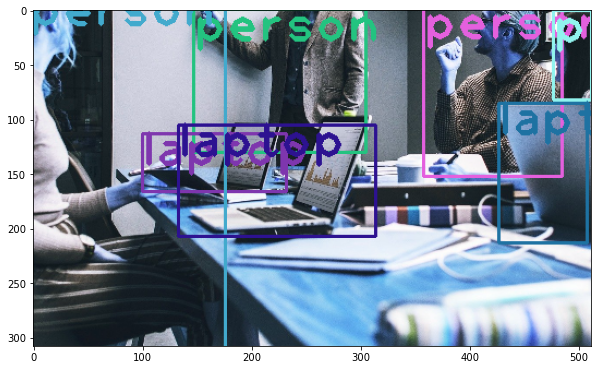

In [10]:
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
        cv2.putText(img,label,(x,y+30),font,3,color,3)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [11]:
def FaceDetect():
    eye_detect = False
    
    face_cascade = cv2.CascadeClassifier('./haarcascade_frontface.xml')
    eye_cascade = cv2.CascadeClassifier('./haarcascade_eye.xml')
    
    try :
        cap = cv2.VideoCapture(0)
    except :
        print("Camera Loading Failed")
        return
    
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    
    out = cv2.VideoWriter('./YOLO/road.avi',cv2.VideoWriter_fourcc('M','J','P','G'),10,(frame_width,frame_height))
    done = True
    while done :
        ret, frame = cap.read()
        
        info = 'Eye detection '
        if eye_detect :
            info += 'On'
        else :
            info += "Off"
            
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        faces = face_cascade.detectMultiScale(gray,1.3,5)
        
        cv2.putText(frame, info,(5,10),font,2,(255,0,0),1)
        for ( x,y,w,h) in faces:
            cv2.rectangle(frame, (x,y),(x+w,y+h), (255,0,0),2)
            cv2.putText(frame,'Deteted Face',(x-5,y-5), font,1,fontColor,fontScale)
            if eye_detect :
                roi_gray = gray[y:y+h,x:x+w]
                roi_color = frame[y:y+h, x:x+w]
                eyes = eye_cascade.detectMultiScale(roi_gray,1.1, 3)
                for (ex,ey,ew,eh) in eyes:
                    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
                    
        out.write(frame)
        cv2.imshow('frame',frame)
        k = cv2.waitKey(20)
        if k == ord('i'):
            eye_detect= not eye_detect
        elif k == ord('q'):
            done = False
    else:
        cap.release()
        out.release()
        cv2.destroyAllWindows()


In [12]:
font = cv2.FONT_HERSHEY_COMPLEX
fontScale = 2
fontColor = (255,0,255)
lineType = 2

In [13]:
FaceDetect()